In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np 
import pandas as pd 

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

In [2]:
df = pd.read_csv("E:/Lakni UOC/4th Year/1st sem/ST 4052 - Statistical Learning II/2.grp project 1/codes_diabetes/diabetes_prediction_dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


# EXPLORATORY DATA ANALYSIS

# Handling Duplicates

In [4]:
df_copy = df.copy()

In [5]:
df_copy.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


In [6]:
# Handle duplicates
duplicate_rows_data = df_copy[df_copy.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (3854, 9)


In [7]:
df_copy.shape

(100000, 9)

In [8]:
df_copy.drop_duplicates(inplace=True)
print(f'without duplicates:{df_copy.shape}')

without duplicates:(96146, 9)


In [9]:
df_copy.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [10]:
df_copy.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


In [11]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


In [12]:
df_copy.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

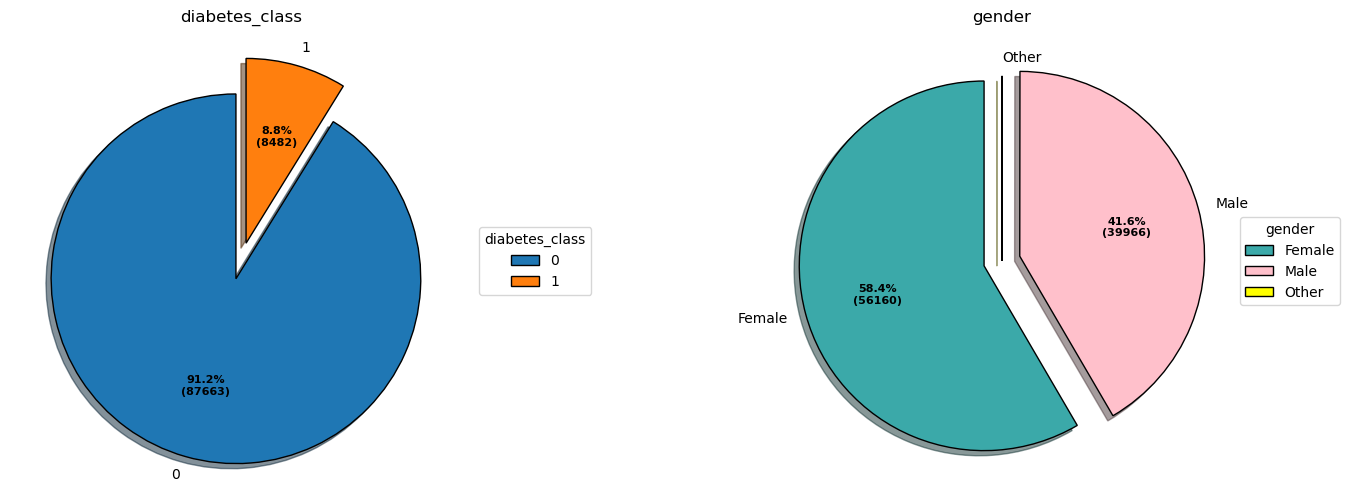

In [13]:
# Creating autocpt arguments
def pie(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute) if pct > 8 else ''

fig, axs = plt.subplots(1,2,figsize =(18, 6))

# class
wedges1, texts1, autotexts1 = axs[0].pie(df_copy['diabetes'].value_counts(),
                                      autopct = lambda pct: pie(pct, df_copy['diabetes'].value_counts()),
                                      explode = (.1, .1),
                                      labels = df_copy['diabetes'].value_counts().index, shadow = True, 
                                      startangle = 90, wedgeprops = { 'linewidth' : 1, 'edgecolor' : "black" }, 
                                      textprops = dict(color ="black"),)
 
# Adding legend
axs[0].legend(wedges1, df_copy['diabetes'].value_counts().index, title='diabetes_class',
          loc ="center left", bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts1, size = 8, weight ="bold")
axs[0].set_title("diabetes_class")

# gender
wedges1, texts1, autotexts1 = axs[1].pie(df_copy['gender'].value_counts(),
                                      autopct = lambda pct: pie(pct, df_copy['gender'].value_counts()),
                                      explode = (0.1, .1,0.00001), colors = ("#3BA9A9", "pink",'yellow'),
                                      labels = df_copy['gender'].value_counts().index, shadow = True, 
                                      startangle = 90, wedgeprops = { 'linewidth' : 1, 'edgecolor' : "black" }, 
                                      textprops = dict(color ="black"),)
 
# Adding legend
axs[1].legend(wedges1, df_copy['gender'].value_counts().index, title='gender',
          loc ="center left", bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts1, size = 8, weight ="bold")
axs[1].set_title("gender")

plt.show()

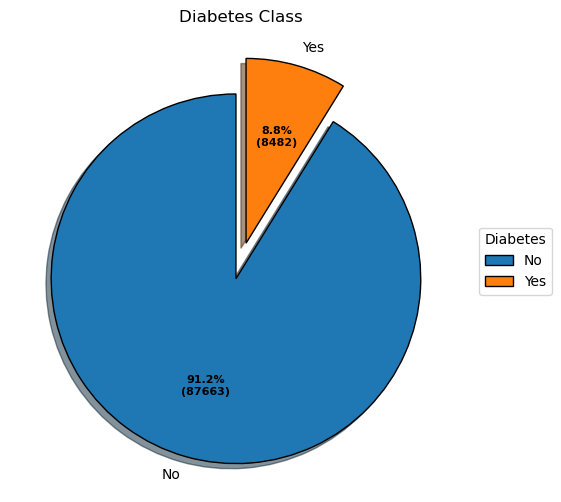

In [14]:
def pie(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute) if pct > 8 else ''

# Create the pie chart for diabetes class
plt.figure(figsize=(6, 6))
wedges, _, autotexts = plt.pie(df_copy['diabetes'].value_counts(),
                              autopct=lambda pct: pie(pct, df_copy['diabetes'].value_counts()),
                              explode=(0.1, 0.1),
                              labels=['No', 'Yes'],  # Modify the labels to display 'No' and 'Yes'
                              shadow=True, startangle=90,
                              wedgeprops={'linewidth': 1, 'edgecolor': "black"},
                              textprops=dict(color="black"))

# Adding legend
plt.legend(wedges, ['No', 'Yes'], title='Diabetes',
           loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")
plt.title("Diabetes Class")
plt.show()


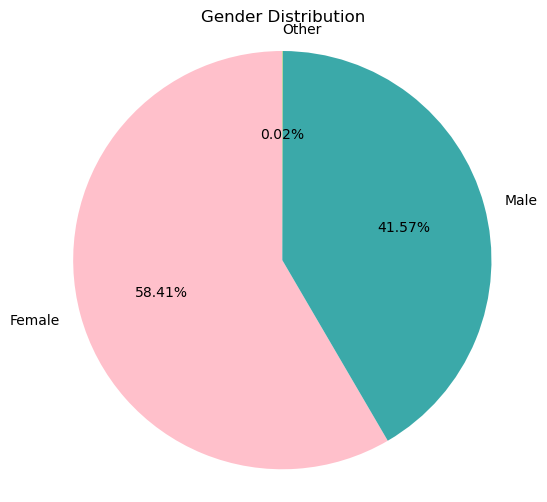

In [15]:

# Count the occurrences of each category in 'gender'
gender_counts = df_copy['gender'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))  # Optional: Set the size of the pie chart
colors = ["pink", "#3BA9A9",'yellow']  # Optional: Custom colors for the pie chart
plt.pie(gender_counts, labels=gender_counts.index, colors=colors,
        autopct=lambda pct: '{:.2f}%'.format(pct), shadow=False, startangle=90)

# Customize the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender Distribution')

# Show the plot
plt.show()

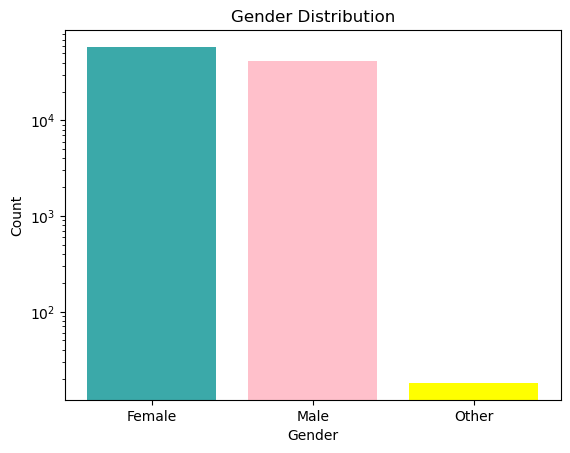

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing the 'gender' column

# Count the occurrences of each gender
gender_counts = df['gender'].value_counts()

# Plot the bar graph
plt.bar(gender_counts.index, gender_counts.values, color=["#3BA9A9", "pink", 'yellow'])

# Customize the plot
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.xticks(rotation=0)

# Use a log scale on the y-axis
plt.yscale('log')

# Show the plot
plt.show()


In [17]:
gender_counts = df['gender'].value_counts()
total_count = gender_counts.sum()
gender_percentages = (gender_counts / total_count) * 100

# Round the percentages to 4 decimal places
gender_percentages = gender_percentages.round(5)
gender_percentages

Female   58.55
Male     41.43
Other     0.02
Name: gender, dtype: float64

In [18]:
# Remove Unneccessary value [0.02%]
df2 = df_copy[df_copy['gender'] != 'Other']


df2.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'heart_disease'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'HbA1c_level'}>,
        <AxesSubplot:title={'center':'blood_glucose_level'}>],
       [<AxesSubplot:title={'center':'diabetes'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

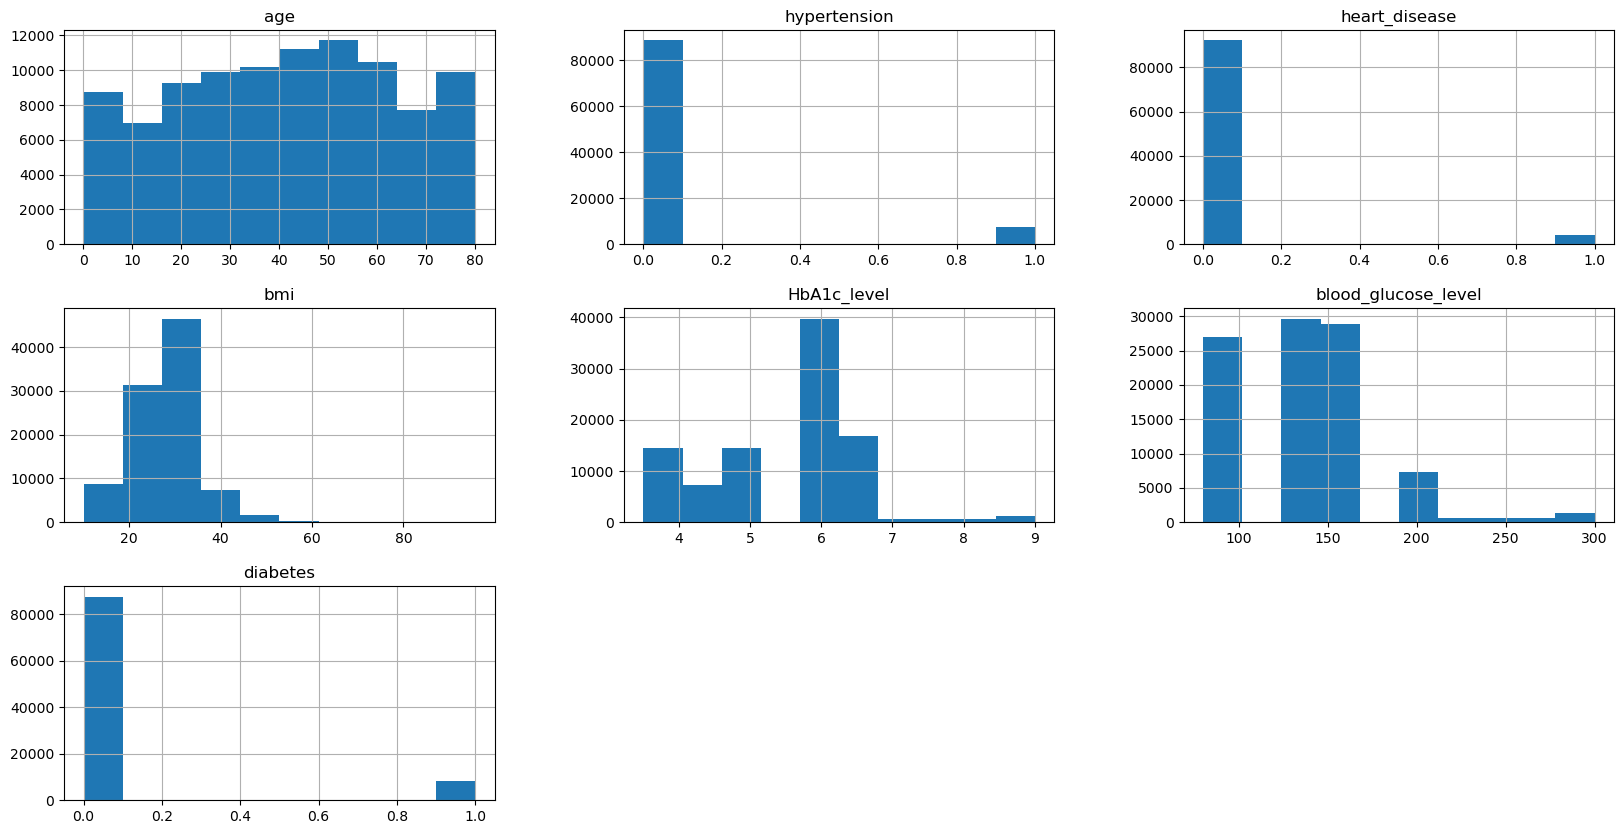

In [19]:
df2.hist(figsize=(20,10))

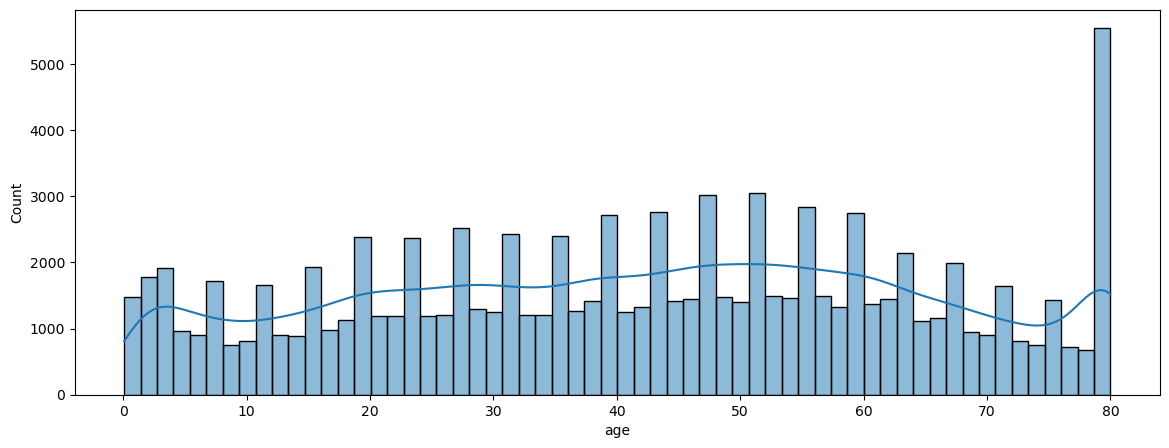

In [20]:
plt.figure(figsize=(14,5))
sns.histplot(data=df2, x="age", bins=60, kde=True)
plt.show()

In [21]:
df2_copy = df2.copy()
df2_copy.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


In [22]:
df2_copy['hypertension'] = df2_copy['hypertension'].astype(str)
df2_copy['heart_disease'] = df2_copy['heart_disease'].astype(str)
df2_copy['diabetes'] = df2_copy['diabetes'].astype(str)

In [23]:
df2_copy.dtypes

gender                  object
age                    float64
hypertension            object
heart_disease           object
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                object
dtype: object

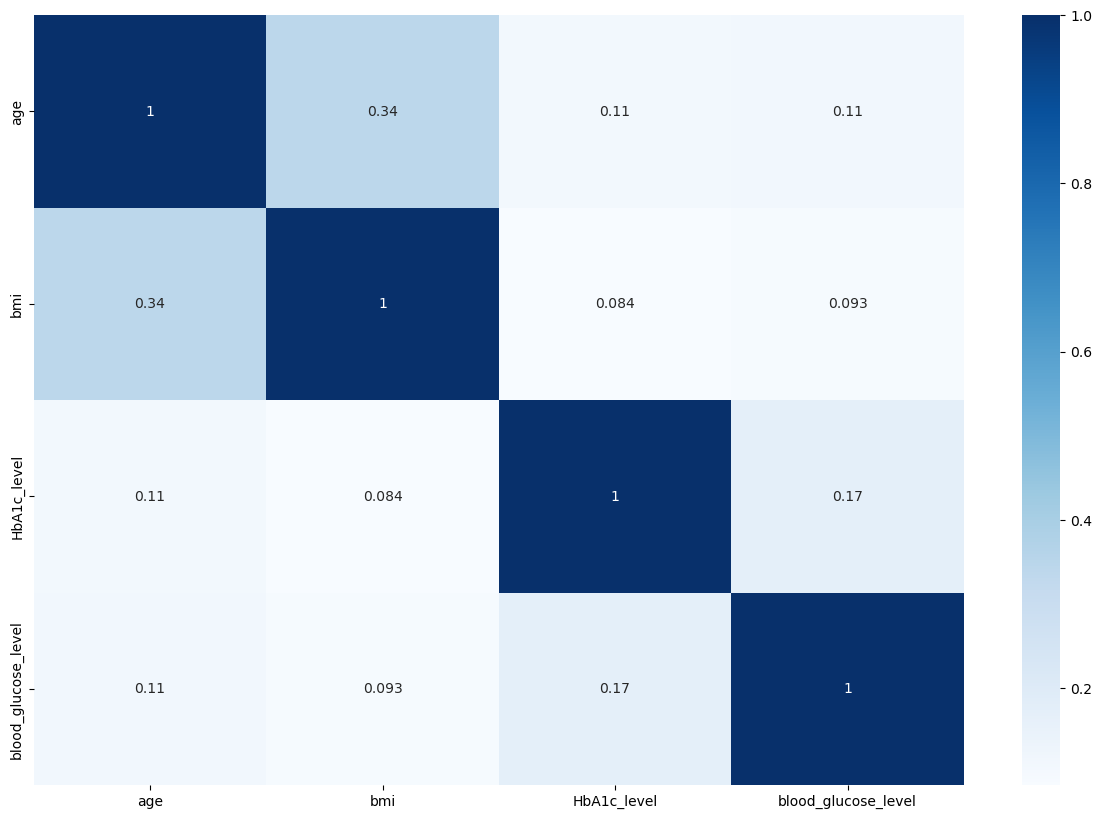

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(df2_copy.corr(), annot=True, cmap='Blues')
plt.show()

<AxesSubplot:>

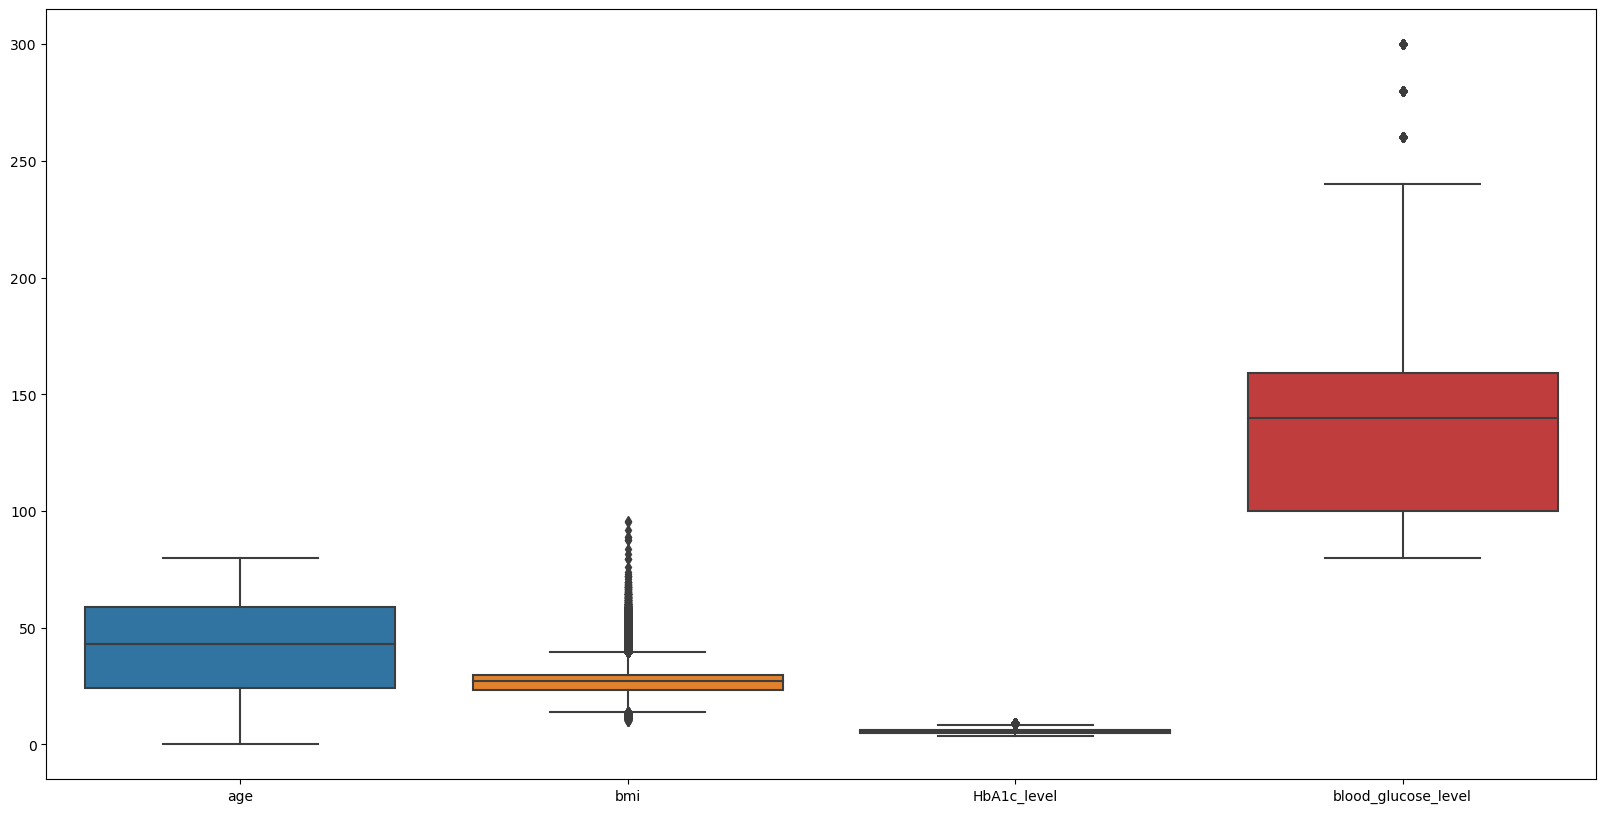

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df2_copy)

In [26]:
df2.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

# bmi

In [27]:
def BMI(bmi):
    if bmi >= 18 and bmi < 26:
        return '18-25(normal)'
    elif bmi < 18:
        return 'underweight'
    elif bmi >= 26 and bmi < 31:
        return '26-30(overweight)'
    elif bmi >= 31 and bmi < 36:
        return '31-35(obese)'
    elif bmi >= 35 and bmi < 41:
        return '35-40(extreme obese)'
    else:
        return '>40(morbidly obese)'

df2['BMI_cat'] = df2['bmi'].apply(BMI)
df2.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,BMI_cat
0,Female,80.00,0,1,never,25.19,6.60,140,0,18-25(normal)
1,Female,54.00,0,0,No Info,27.32,6.60,80,0,26-30(overweight)
2,Male,28.00,0,0,never,27.32,5.70,158,0,26-30(overweight)
3,Female,36.00,0,0,current,23.45,5.00,155,0,18-25(normal)
4,Male,76.00,1,1,current,20.14,4.80,155,0,18-25(normal)


In [28]:
filtered_data1 = df2[(df2['age'] < 80) & (df2['smoking_history'] == 'No Info')]
filtered_data1

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,BMI_cat
1,Female,54.00,0,0,No Info,27.32,6.60,80,0,26-30(overweight)
7,Female,79.00,0,0,No Info,23.86,5.70,85,0,18-25(normal)
14,Female,76.00,0,0,No Info,27.32,5.00,160,0,26-30(overweight)
15,Male,78.00,0,0,No Info,27.32,6.60,126,0,26-30(overweight)
18,Female,42.00,0,0,No Info,27.32,5.70,80,0,26-30(overweight)
...,...,...,...,...,...,...,...,...,...,...
99981,Male,26.00,0,0,No Info,24.08,5.80,90,0,18-25(normal)
99983,Female,21.00,0,0,No Info,27.32,5.70,126,0,26-30(overweight)
99988,Male,19.00,0,0,No Info,25.75,5.00,145,0,18-25(normal)
99994,Female,36.00,0,0,No Info,24.60,4.80,145,0,18-25(normal)


# age

In [29]:
def age_dist(age):
    if age >= 16 and age < 25:
        return '16-24'
    elif age < 16:
        return '0-15'
    elif age >= 25 and age < 50:
        return '25-49'
    elif age >= 50 and age < 65:
        return '50-64'
    else:
        return '65+'

df2['age_dist'] = df2['age'].apply(age_dist)
df2.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,BMI_cat,age_dist
0,Female,80.00,0,1,never,25.19,6.60,140,0,18-25(normal),65+
1,Female,54.00,0,0,No Info,27.32,6.60,80,0,26-30(overweight),50-64
2,Male,28.00,0,0,never,27.32,5.70,158,0,26-30(overweight),25-49
3,Female,36.00,0,0,current,23.45,5.00,155,0,18-25(normal),25-49
4,Male,76.00,1,1,current,20.14,4.80,155,0,18-25(normal),65+


# split to train and test

In [30]:
training_data, testing_data = train_test_split(df2, test_size=0.2, random_state=42)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 76902
No. of testing examples: 19226


In [31]:
training_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,BMI_cat,age_dist
39756,Female,8.00,0,0,No Info,15.90,3.50,90,0,underweight,0-15
75304,Male,65.00,1,1,never,28.49,8.80,145,1,26-30(overweight),65+
19765,Male,64.00,1,0,No Info,33.69,4.80,80,0,31-35(obese),50-64
97291,Male,49.00,0,0,never,21.84,5.00,130,0,18-25(normal),25-49
37660,Female,26.00,0,0,never,21.95,5.70,158,0,18-25(normal),25-49


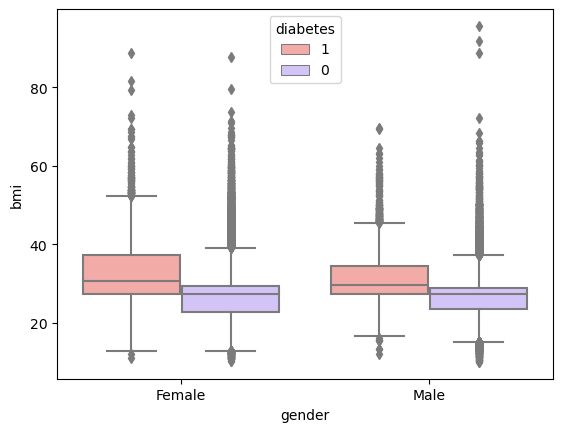

In [32]:
var = 'bmi'
sns.boxplot(x='gender', y=var, data=training_data,hue='diabetes',hue_order = [1,0],palette=sns.color_palette('pastel')[3:9])
#plt.ylim(0, 70)
plt.show()

Being overweight (BMI of 25-29.9), or affected by obesity (BMI of 30-39.9) or morbid obesity (BMI of 40 or greater), greatly increases your risk of developing type 2 diabetes. The more excess weight you have, the more resistant your muscle and tissue cells become to your own insulin hormone. More than 90 percent of people with type 2 diabetes are overweight or affected by a degree of obesity.

https://www.honorhealth.com/


This study showed that T1DM patients have higher BMI values compared to the general Austrian population.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6394663/

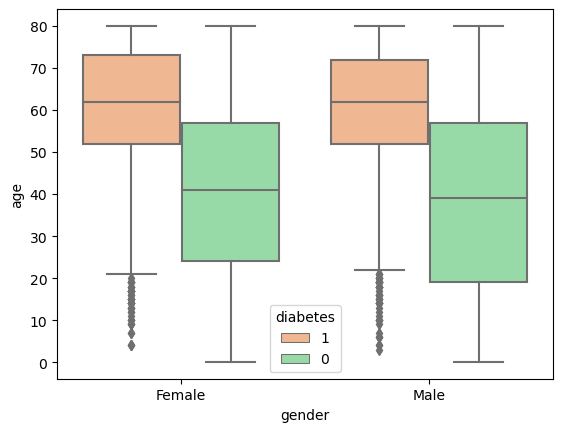

In [33]:
var = 'age'
sns.boxplot(x='gender', y=var, data=training_data ,hue='diabetes',hue_order = [1,0], palette=sns.color_palette('pastel')[1:8])
#plt.ylim(0, 70)
plt.show()

In China, most people with diabetes and prediabetes are over 40 years.

2. Wang L, Peng W, Zhao Z, et al. Prevalence and Treatment of Diabetes in China, 2013–2018. JAMA. 2021;326(24):2498–2506. doi: 10.1001/jama.2021.22208 [PMC free article] [PubMed] [CrossRef] [Google Scholar] [Ref list]

The onset of type 2 diabetes is most common in people aged 45–64. It usually appears after the age of 45 but can occur at any age.

https://www.medicalnewstoday.com/

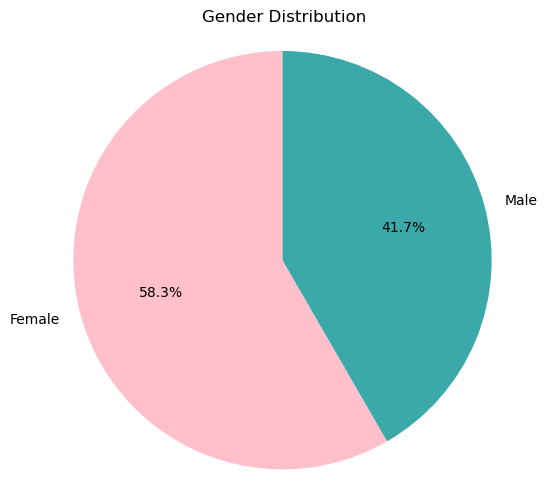

In [34]:

# Count the occurrences of each category in 'gender'
gender_counts = training_data['gender'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))  # Optional: Set the size of the pie chart
colors = ["pink", "#3BA9A9"]  # Optional: Custom colors for the pie chart
plt.pie(gender_counts, labels=gender_counts.index, colors=colors,
        autopct=lambda pct: '{:.1f}%'.format(pct), shadow=False, startangle=90)

# Customize the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender Distribution')

# Show the plot
plt.show()


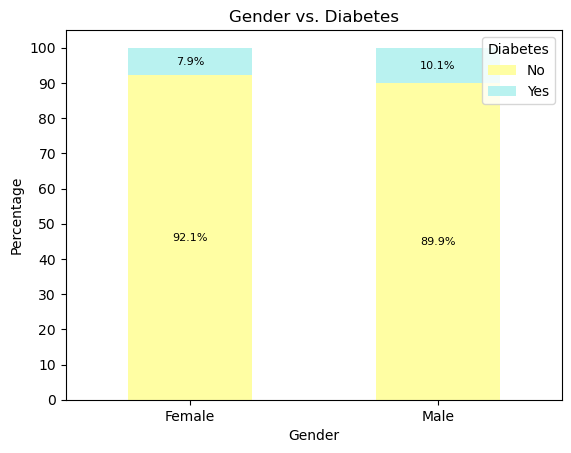

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and contains 'gender' and 'diabetes' columns

# Create a contingency table (cross-tabulation) for 'gender' vs. 'diabetes'
ct = pd.crosstab(training_data['gender'], training_data['diabetes'], normalize='index') * 100

# Plot the stacked bar chart
ax = ct.plot(kind='bar', stacked=True,color=sns.color_palette('pastel')[8:10])

# Customize the plot
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Gender vs. Diabetes')
plt.legend(title='Diabetes', labels=['No', 'Yes'], loc='upper right')
plt.xticks(rotation=0)
plt.yticks(range(0, 101, 10))  # Set y-axis ticks at 0, 10, 20, ..., 100

# Add percentage labels on each part of the stacked bar
for container in ax.containers:
    for bar in container.patches:
        height = bar.get_height()
        percentage = f'{height:.1f}%'  # Calculate the percentage for each part of the stacked bar
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, percentage,
                ha='center', va='center', fontsize=8, color='black')

# Show the plot
plt.show()


https://www.researchgate.net/publication/235388318/figure/fig3/AS:631236867420162@1527510005751/Degree-of-Risk-for-Type-2-Diabetes-vs-Gender.png

https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.researchgate.net%2Ffigure%2FDegree-of-Risk-for-Type-2-Diabetes-vs-Gender_fig3_235388318&psig=AOvVaw0uW75GAjQxXcSgyr302NgB&ust=1689868857561000&source=images&cd=vfe&opi=89978449&ved=0CBMQjhxqFwoTCPD4yJmSm4ADFQAAAAAdAAAAABA-

https://www.healthandenvironment.org/assets/images/DiabetesRates1.png

https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.healthandenvironment.org%2Fenvironmental-health%2Fhealth-diseases-and-disabilities%2Fdiabetes-research-and-resources&psig=AOvVaw0uW75GAjQxXcSgyr302NgB&ust=1689868857561000&source=images&cd=vfe&opi=89978449&ved=0CBMQjhxqFwoTCPD4yJmSm4ADFQAAAAAdAAAAABAm

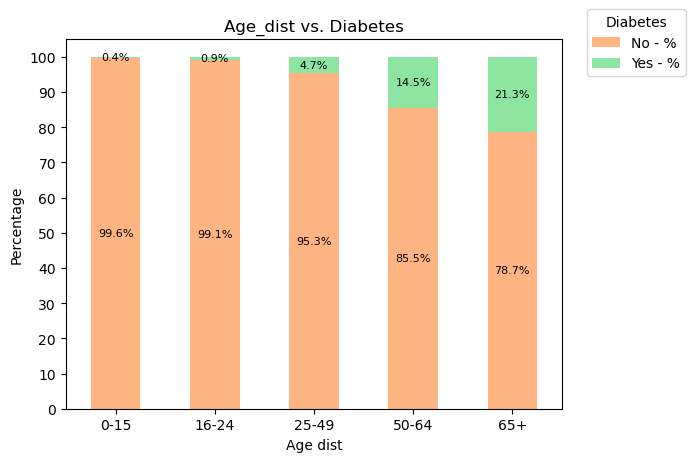

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'training_data' and contains 'age_dist' and 'diabetes' columns

# Define the desired order of categories for 'age_dist'
age_dist_order = ['0-15', '16-24', '25-49', '50-64', '65+']

# Convert 'age_dist' to a Categorical data type with the specified order
training_data['age_dist'] = pd.Categorical(training_data['age_dist'], categories=age_dist_order, ordered=True)

# Create a contingency table (cross-tabulation) for 'age_dist' vs. 'diabetes'
ct = pd.crosstab(training_data['age_dist'], training_data['diabetes'], normalize='index') * 100

# Plot the stacked bar chart
ax = ct.plot(kind='bar', stacked=True, color=sns.color_palette('pastel')[1:8])

# Customize the plot
plt.xlabel('Age dist')
plt.ylabel('Percentage')
plt.title('Age_dist vs. Diabetes')
# Move the legend above the graph (adjust the coordinates as needed)
plt.legend(title='Diabetes', labels=['No - %', 'Yes - %'], loc='upper center', bbox_to_anchor=(1.15, 1.1), ncol=1)
plt.xticks(rotation=0)
plt.yticks(range(0, 101, 10))  # Set y-axis ticks at 0, 10, 20, ..., 100

# Add percentage labels on each part of the stacked bar
for container in ax.containers:
    for bar in container.patches:
        height = bar.get_height()
        percentage = f'{height:.1f}%'  # Calculate the percentage for each part of the stacked bar
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, percentage,
                ha='center', va='center', fontsize=8, color='black')

# Show the plot
plt.show()


https://www.researchgate.net/publication/304778746/figure/fig17/AS:668877331656714@1536484191771/Diabetes-prevalence-total-and-as-a-percentage-of-age-population-for-males-and-females.png

https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.researchgate.net%2Ffigure%2FDiabetes-prevalence-total-and-as-a-percentage-of-age-population-for-males-and-females_fig17_304778746&psig=AOvVaw2WqMYc_GWFs8LpITs0-Jcs&ust=1689866119680000&source=images&cd=vfe&opi=89978449&ved=0CBMQjhxqFwoTCKiwu6WTm4ADFQAAAAAdAAAAABAE

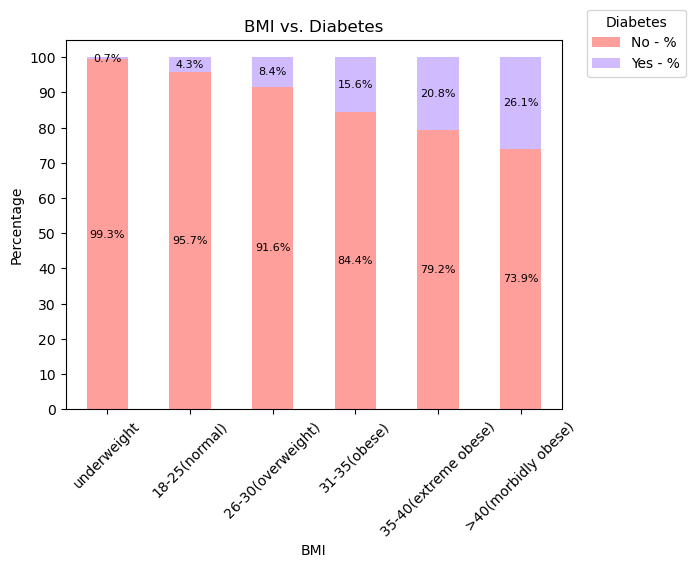

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'training_data' and contains 'age_dist' and 'diabetes' columns

# Define the desired order of categories for 'age_dist'
bmi_order = ['underweight', '18-25(normal)', '26-30(overweight)', '31-35(obese)', '35-40(extreme obese)','>40(morbidly obese)']

# Convert 'age_dist' to a Categorical data type with the specified order
training_data['BMI_cat'] = pd.Categorical(training_data['BMI_cat'], categories=bmi_order, ordered=True)

# Create a contingency table (cross-tabulation) for 'age_dist' vs. 'diabetes'
ct = pd.crosstab(training_data['BMI_cat'], training_data['diabetes'], normalize='index') * 100

# Plot the stacked bar chart
ax = ct.plot(kind='bar', stacked=True, color=sns.color_palette('pastel')[3:9])

# Customize the plot
plt.xlabel('BMI')
plt.ylabel('Percentage')
plt.title('BMI vs. Diabetes')
# Move the legend above the graph (adjust the coordinates as needed)
plt.legend(title='Diabetes', labels=['No - %', 'Yes - %'], loc='upper center', bbox_to_anchor=(1.15, 1.1), ncol=1)
plt.xticks(rotation=45)
plt.yticks(range(0, 101, 10))  # Set y-axis ticks at 0, 10, 20, ..., 100

# Add percentage labels on each part of the stacked bar
for container in ax.containers:
    for bar in container.patches:
        height = bar.get_height()
        percentage = f'{height:.1f}%'  # Calculate the percentage for each part of the stacked bar
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, percentage,
                ha='center', va='center', fontsize=8, color='black')

# Show the plot
plt.show()


https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.ncbi.nlm.nih.gov%2Fbooks%2FNBK567980%2Ffigure%2Fch16.fig4%2F&psig=AOvVaw22gSgwkms4_e-l6Q9qtW4F&ust=1689870258252000&source=images&cd=vfe&opi=89978449&ved=0CBMQjhxqFwoTCOiuo7aXm4ADFQAAAAAdAAAAABAZ

https://www.google.com/url?sa=i&url=https%3A%2F%2Fpt.slideshare.net%2Frobertpracticefusion%2Fdiabetesbmi-correlation%3Fnomobile%3Dtrue&psig=AOvVaw22gSgwkms4_e-l6Q9qtW4F&ust=1689870258252000&source=images&cd=vfe&opi=89978449&ved=0CBMQjhxqFwoTCOiuo7aXm4ADFQAAAAAdAAAAABAp

In [38]:
df2.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00
mean,41.80,0.08,0.04,27.32,5.53,138.22,0.09
std,22.46,0.27,0.20,6.77,1.07,40.91,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.40,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.86,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.cdc.gov%2Fdiabetes%2Fbasics%2Fgetting-tested.html&psig=AOvVaw3tcWZoHAFY4UhtU_BXNfr4&ust=1689883190787000&source=images&cd=vfe&opi=89978449&ved=0CBEQjRxqFwoTCOjMm8zHm4ADFQAAAAAdAAAAABAE

https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.singlecare.com%2Fblog%2Fblood-sugar-chart%2F&psig=AOvVaw0BXdhPqyzy4G1pdFepLCcW&ust=1689883513353000&source=images&cd=vfe&opi=89978449&ved=0CBEQjRxqFwoTCKDO9eXIm4ADFQAAAAAdAAAAABAR

https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.facebook.com%2Fdiet.kundali%2Fphotos%2Fa.241785939324035%2F1510380715797878%2F%3Ftype%3D3&psig=AOvVaw0ZqTYjBT5K9Vqds93NgL0F&ust=1689883810053000&source=images&cd=vfe&opi=89978449&ved=0CBEQjRxqFwoTCPC6pPPJm4ADFQAAAAAdAAAAABAJ

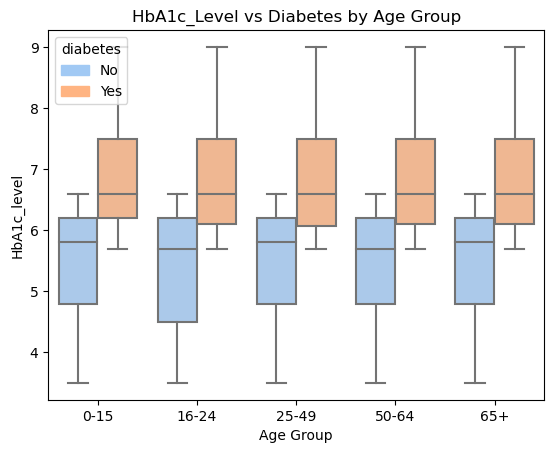

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'training_data' containing 'age_dist', 'HbA1c_level', and 'diabetes' columns
# 'colors' is defined as the first two colors from the 'pastel' color palette
colors = sns.color_palette('pastel')[0:2]

# Define the order of categories for 'age_dist'
age_dist_order = ['0-15', '16-24', '25-49', '50-64', '65+']

# Create the boxplot
sns.boxplot(x='age_dist', y='HbA1c_level', hue='diabetes', data=training_data, order=age_dist_order,palette=sns.color_palette('pastel')[0:2])

# Set the title and labels
plt.title('HbA1c_Level vs Diabetes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('HbA1c_level')

# Create custom legend labels with colored markers
legend_labels = ["No", "Yes"]
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_handles, legend_labels, title='diabetes')

# Customize the x-ticks
plt.xticks(range(len(age_dist_order)), age_dist_order, rotation=0)

# Show the plot
plt.show()


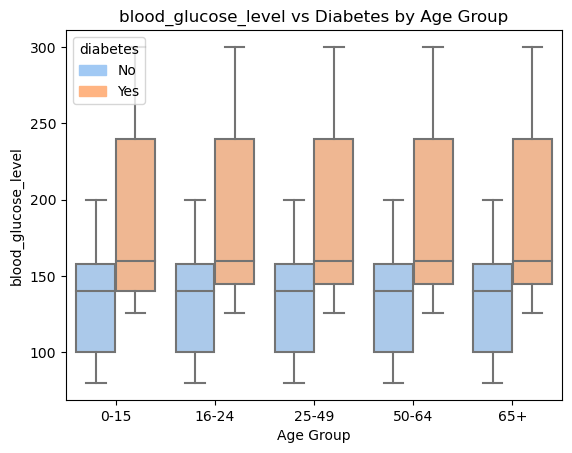

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'training_data' containing 'age_dist', 'HbA1c_level', and 'diabetes' columns
# 'colors' is defined as the first two colors from the 'pastel' color palette
colors = sns.color_palette('pastel')[0:2]

# Define the order of categories for 'age_dist'
age_dist_order = ['0-15', '16-24', '25-49', '50-64', '65+']

# Create the boxplot
sns.boxplot(x='age_dist', y='blood_glucose_level', hue='diabetes', data=training_data, order=age_dist_order,palette=sns.color_palette('pastel')[0:2])

# Set the title and labels
plt.title('blood_glucose_level vs Diabetes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('blood_glucose_level')

# Create custom legend labels with colored markers
legend_labels = ["No", "Yes"]
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_handles, legend_labels, title='diabetes')

# Customize the x-ticks
plt.xticks(range(len(age_dist_order)), age_dist_order, rotation=0)

# Show the plot
plt.show()


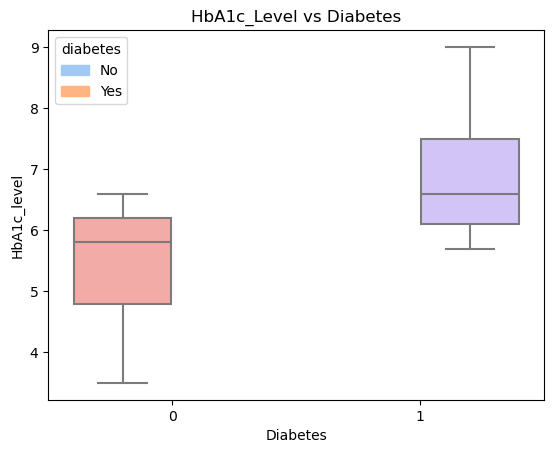

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'training_data' containing 'age_dist', 'HbA1c_level', and 'diabetes' columns
# 'colors' is defined as the first two colors from the 'pastel' color palette
colors = sns.color_palette('pastel')[0:2]


# Create the boxplot
sns.boxplot(x='diabetes', y='HbA1c_level', hue='diabetes', data=training_data, palette=sns.color_palette('pastel')[3:5])

# Set the title and labels
plt.title('HbA1c_Level vs Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('HbA1c_level')

# Create custom legend labels with colored markers
legend_labels = ["No", "Yes"]
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_handles, legend_labels, title='diabetes')

# Customize the x-ticks
plt.xticks(rotation=0)

# Show the plot
plt.show()


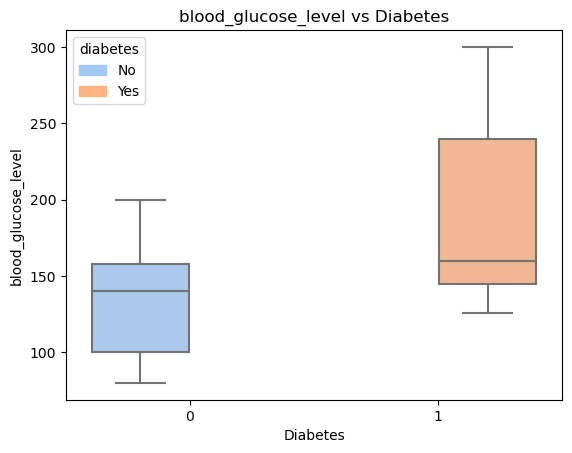

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'training_data' containing 'age_dist', 'HbA1c_level', and 'diabetes' columns
# 'colors' is defined as the first two colors from the 'pastel' color palette
colors = sns.color_palette('pastel')[0:2]


# Create the boxplot
sns.boxplot(x='diabetes', y='blood_glucose_level', hue='diabetes', data=training_data, palette=sns.color_palette('pastel')[0:2])

# Set the title and labels
plt.title('blood_glucose_level vs Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('blood_glucose_level')

# Create custom legend labels with colored markers
legend_labels = ["No", "Yes"]
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_handles, legend_labels, title='diabetes')

# Customize the x-ticks
plt.xticks(rotation=0)

# Show the plot
plt.show()
